<center><h1>Chen_WeiChieh_HW2</h1></center>
<br>
<br>

Name: WeiChieh Chen
<br>
Github Username: raychencssw
<br>
USC ID: 6284920085

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [19]:
import pandas as pd
import numpy.polynomial.polynomial as poly
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from ISLP.models import summarize
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import sys
from sklearn.preprocessing import MinMaxScaler

Get the Cycle Power Plant Data Set

In [20]:
file_path = '../data/Folds5x2_pp.xlsx'
ccpp_data = pd.read_excel(file_path,'Sheet1')
print(ccpp_data.columns)
ccpp_data

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns  
- 9568 rows, each row represent  
- 5 columns, the first 4 columns represent predictors, the last column represent the true value of Energy Output(EP)

In [21]:
print(ccpp_data.shape)

(9568, 5)


#### ii. pairwise scatterplots of all the varianbles  
- Because Exhaust Vacuum(V) is the only factor that affects ST, so we start our observation from V  
- When V increases, the net hourly electrical energy output(PE) decreases. Also the hourly average ambient variable Temperature(AT) increases as well. Other variables seems no change.
- When AT increase, V increses, Ambient Pressure(AP) and Relative Humidity(RH) seems decrease a little bit. However, PE decreases and has strong correlation with AT.  
- AP and RH seems has little correlation with PE  
- The histogram of AT, V and PE are similar as bimodal distribution. It seems AT and V are key factors that control PE.  

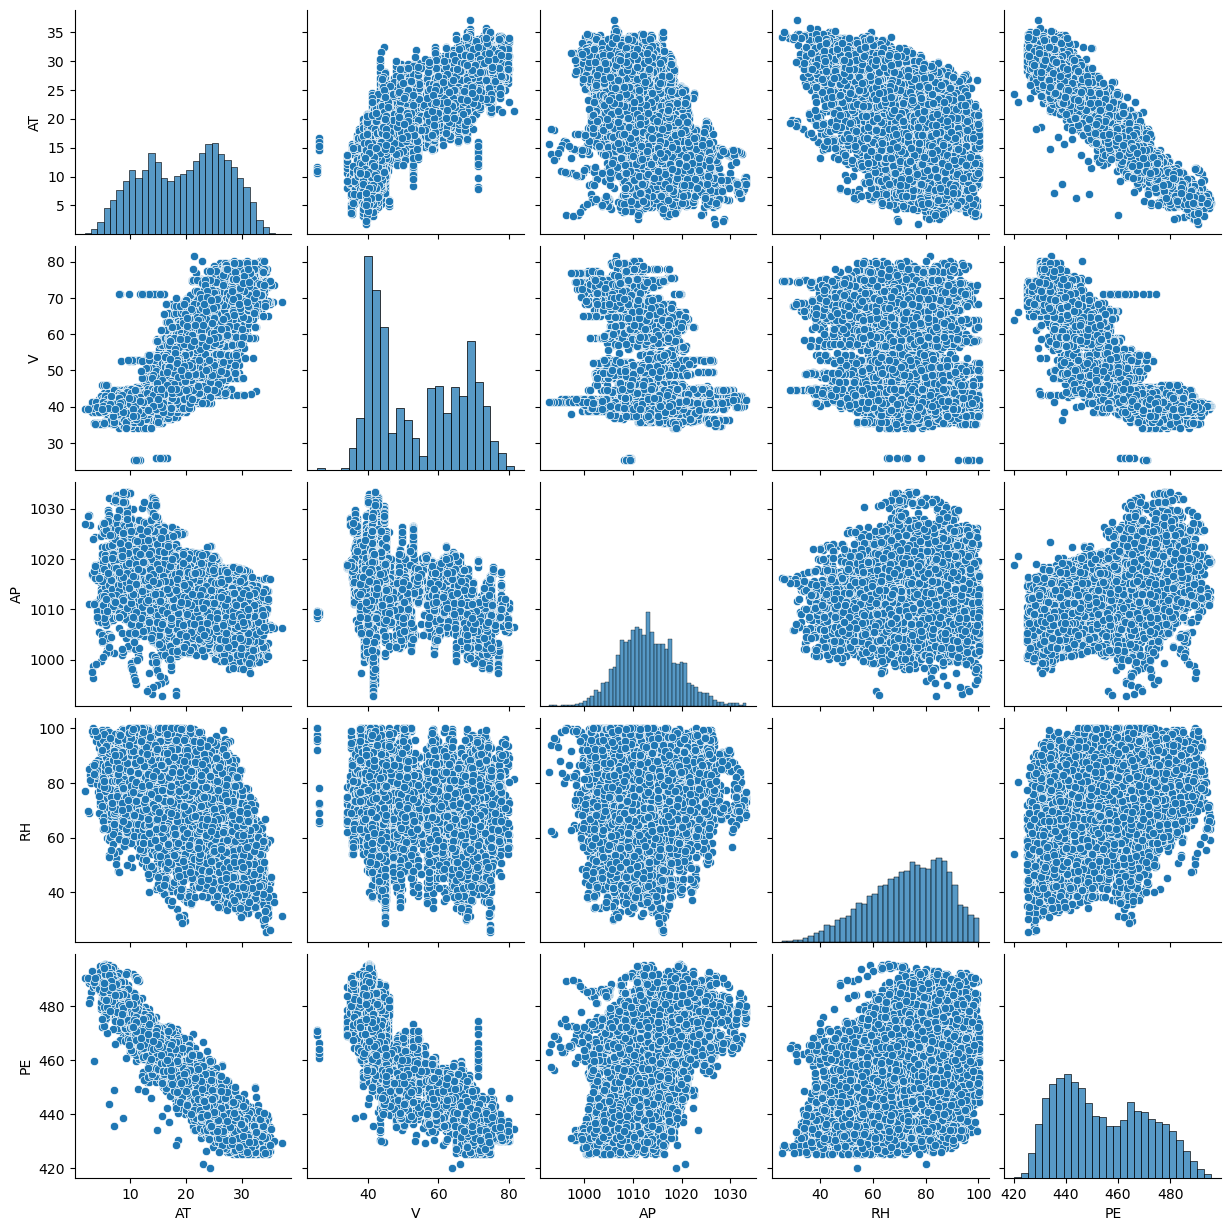

In [22]:
sns.pairplot(ccpp_data)

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [23]:
# set the precision to 2 digits after the decimal points
pd.set_option('display.float_format', '{:.2f}'.format)

# get the statistical data
summary = ccpp_data.describe()

# add range and IQR for the summary table
summary.loc['range'] = summary.loc['max'] - summary.loc['min']
summary.loc['IQR'] = summary.loc['75%'] - summary.loc['25%']
summary



,AT,V,AP,RH,PE
count,9568.00,9568.00,9568.00,9568.00,9568.00
mean,19.65,54.31,1013.26,73.31,454.37
std,7.45,12.71,5.94,14.60,17.07
min,1.81,25.36,992.89,25.56,420.26
25%,13.51,41.74,1009.10,63.33,439.75
50%,20.34,52.08,1012.94,74.97,451.55
75%,25.72,66.54,1017.26,84.83,468.43
max,37.11,81.56,1033.30,100.16,495.76
range,35.30,56.20,40.41,74.60,75.50
IQR,12.21,24.80,8.16,21.50,28.68


### (c) Simple Linear Regression  
- All the predictors are statistically significant because p value are all extremely small.
- The scatter plots shows that the relation between each preditors and PE can be fitted by a regression line.
- There are outliers in AP and RH and they are marked in orange.

no outliers in term of y
no outliers in term of x


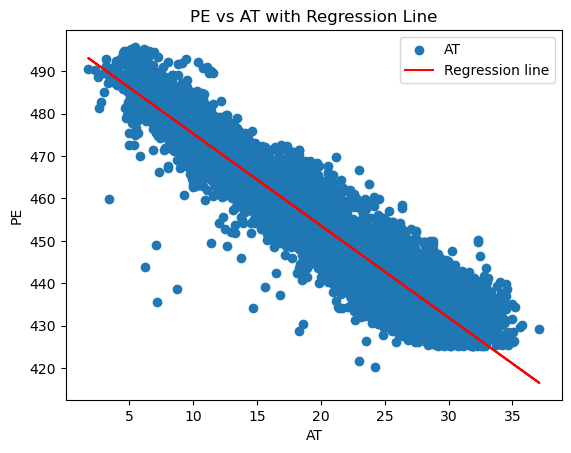

no outliers in term of y
no outliers in term of x


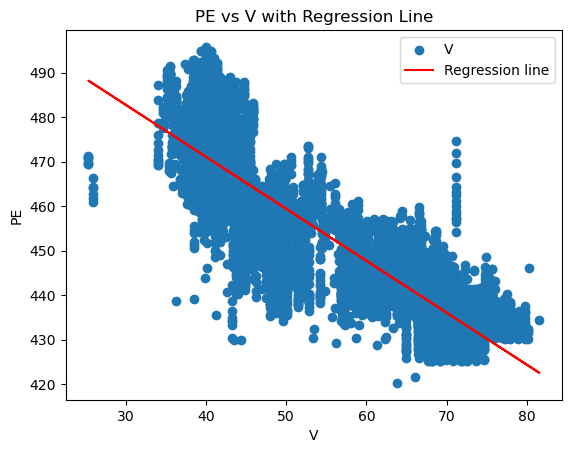

no outliers in term of y
has outliers in terms of x


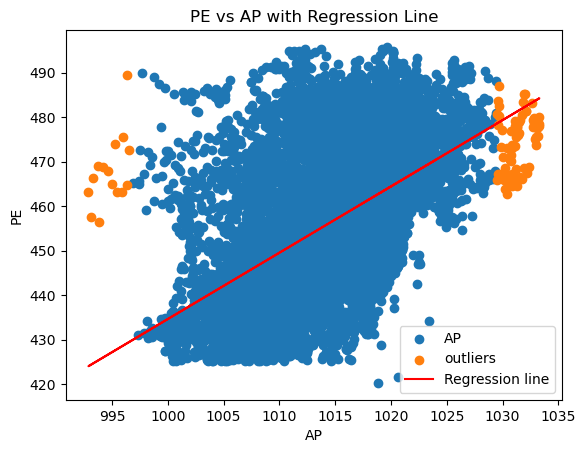

no outliers in term of y
has outliers in terms of x


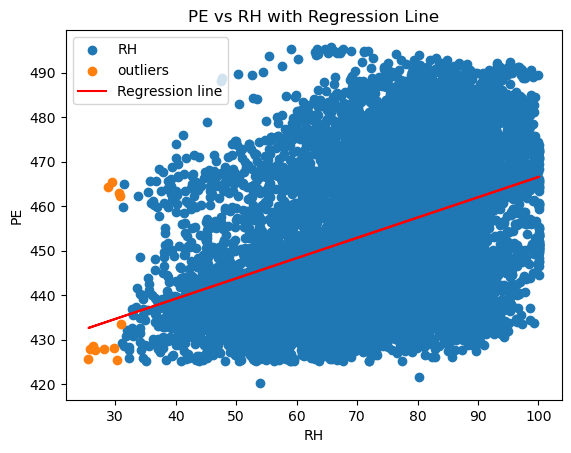

,predictor,Coefficient,Std. Error,t-statistic,p-value
0,AT,-2.17,0.01,-291.71,0.00
1,V,-1.17,0.01,-172.40,0.00
2,AP,1.49,0.03,59.30,0.00
3,RH,0.46,0.01,41.40,0.00


In [24]:

y = ccpp_data['PE']
# print(y.shape)
summary =[]
for predictor in ccpp_data.columns:  
   if(predictor != 'PE'):
      x = ccpp_data[predictor]

      has_y_outliers = False
      has_x_outliers = False

      # find out outliers in terms of y
      y_Q1 = y.quantile(0.25)
      y_Q3 = y.quantile(0.75)
      y_IQR = y_Q3 - y_Q1

      y_lower_bound = y_Q1 - 1.5 * y_IQR
      y_upper_bound = y_Q3 + 1.5 * y_IQR

      y_outliers = (y < y_lower_bound) | (y > y_upper_bound) 
   
      x_y_outliers = x[y_outliers]
      y_y_outliers = y[y_outliers]
      x_y_non_outliers = x[~y_outliers]
      y_y_non_outliers = y[~y_outliers]
      
      if( len(x_y_outliers) or len(y_y_outliers)):
         print('has outliers in terms of y')
         has_y_outliers = True
         # print(x_y_outliers)
         # print(y_y_outliers)
      else:
         print('no outliers in term of y')

      # find out outliers in terms of y
      x_Q1 = x.quantile(0.25)
      x_Q3 = x.quantile(0.75)
      x_IQR = x_Q3 - x_Q1

      x_lower_bound = x_Q1 - 1.5 * x_IQR
      x_upper_bound = x_Q3 + 1.5 * x_IQR

      x_outliers = (x < x_lower_bound) | (x > x_upper_bound) 

      x_x_outliers = x[x_outliers]
      y_x_outliers = y[x_outliers]
      x_x_non_outliers = x[~x_outliers]
      y_x_non_outliers = y[~x_outliers]

      if( len(x_x_outliers) or len(y_x_outliers)):
         print('has outliers in terms of x')
         has_x_outliers = True
         # print(x_x_outliers)
         # print(y_x_outliers)
      else:
         print('no outliers in term of x')

      if has_x_outliers and has_y_outliers:
         xy_outliers = (x < x_lower_bound) | (x > x_upper_bound) | (y < y_lower_bound) | (y > y_upper_bound)
         x_plot_outliers = x[xy_outliers]
         y_plot_outliers = y[xy_outliers]
         x_plot = x[~xy_outliers]
         y_plot = y[~xy_outliers]

      elif has_x_outliers and not has_y_outliers:
         x_plot_outliers = x[x_outliers]
         y_plot_outliers = y[x_outliers]
         x_plot = x[~x_outliers]
         y_plot = y[~x_outliers]

      elif has_y_outliers and not has_x_outliers:
         x_plot_outliers = x[y_outliers]
         y_plot_outliers = y[y_outliers]
         x_plot = x[~y_outliers]
         y_plot = y[~y_outliers]

      else:
         x_plot = x
         y_plot = y
      

      # use numpy to fit a 1-D polynomial model for fitting a regression line
      polynomial = poly.Polynomial.fit(x,y,1)
      # slope, intercept = polynomial.convert().coef
      # print('slope: ', slope)
      # print('intercept: ', intercept)

      # plot data point and regression line on the same plot, add label for outliers
      plt.scatter(x_plot, y_plot, label=predictor) 
      if(has_x_outliers or has_x_outliers):
         plt.scatter(x_plot_outliers, y_plot_outliers, label='outliers')
   
      plt.plot(x, polynomial(x), color='red', label='Regression line')

      plt.xlabel(predictor)
      plt.ylabel('PE')
      plt.title('PE vs ' +str(predictor) + ' with Regression Line')
      plt.legend()
      plt.show()

      # Before feeding x to OLS, need to add constant, or won't get intercept data
      x = sm.add_constant(x)
      # print(x.shape)

      # use statsmodel to check statistically significance and summarize result 
      result = sm.OLS(y, x).fit()
      # print('Summary for PE vs ' + predictor + ': ')
      # print(summarize(result))
      # print('\n')
      result = summarize(result)
      summary.append({
         'predictor': predictor,
         'Coefficient': result['coef'].loc[predictor],
         'Std. Error': result['std err'].loc[predictor],
         't-statistic': result['t'].loc[predictor],
         'p-value': result['P>|t|'].loc[predictor]
         })
summary = pd.DataFrame(summary)
summary


### (d) Multiple Regression  
- All the predictors are statistically significant since their p values are extemely small, hence, we can reject null hypothesis for all the predictors.

In [25]:
y_multi = ccpp_data['PE']
x_multi = ccpp_data.loc[:,ccpp_data.columns != 'PE']

x_multi = sm.add_constant(x_multi)
model_multi = sm.OLS(y_multi, x_multi)
results_multi = model_multi.fit()

results_multi = summarize(results_multi)
results_multi



,coef,std err,t,P>|t|
const,454.61,9.75,46.63,0.00
AT,-1.98,0.01,-129.34,0.00
V,-0.23,0.01,-32.12,0.00
AP,0.06,0.01,6.56,0.00
RH,-0.16,0.00,-37.92,0.00


### (e) 1c Compare to 1d

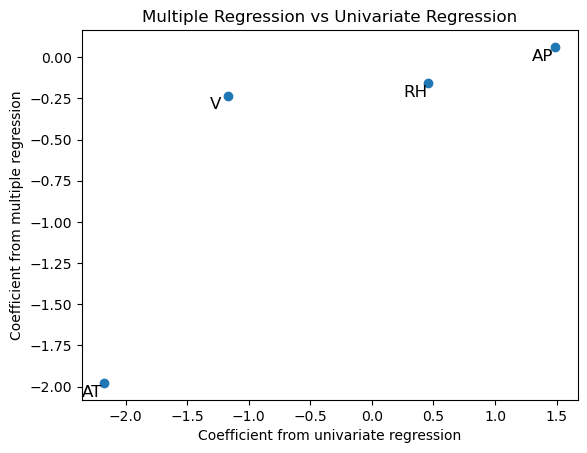

In [26]:
# print(type(results_multi))
# print(results_multi['coef'])
coe_uni =  summary['Coefficient']
coe_multi = results_multi['coef'][1:]

# print(len(coe_uni))
# print(len(coe_multi))

plt.scatter(coe_uni,coe_multi)

labels = ['AT', 'V', 'AP', 'RH'] 
for i, label in enumerate(labels):
    plt.text(coe_uni[i] - 0.1, coe_multi[i] - 0.1 , label, fontsize=12, ha='center', va='bottom')

plt.xlabel('Coefficient from univariate regression')
plt.ylabel('Coefficient from multiple regression')
plt.title('Multiple Regression vs Univariate Regression')

plt.show()

### (f) Nonlinear Association  
- Except V2, of which p value is 0.77 thus statisticall insignificant, all others are statistically significant. To sum up, predictor V doesn't have nonlinear association, but other predictors do.

In [27]:
y_nonlinear = ccpp_data['PE']

for predictor in ccpp_data.columns:  
    if(predictor != 'PE'):
        x = ccpp_data[predictor]
        x2 = ccpp_data[predictor] ** 2
        x3 = ccpp_data[predictor] ** 3
        data = { predictor : x, predictor+str(2): x2, predictor+str(3): x3}
        x_nonlinear = pd.DataFrame(data)
        # print(x_nonlinear)
        x_nonlinear = sm.add_constant(x_nonlinear)
        model_nonlinear = sm.OLS(y_nonlinear, x_nonlinear)
        results_nonlinear = model_nonlinear.fit()

        results_nonlinear = summarize(results_nonlinear)
        print(results_nonlinear)
        print('\n')


        coef  std err      t  P>|t|
const 492.73     0.67 732.25   0.00
AT     -0.61     0.12  -4.94   0.00
AT2    -0.13     0.01 -18.20   0.00
AT3     0.00     0.00  22.59   0.00


        coef  std err     t  P>|t|
const 554.15     9.15 60.56   0.00
V      -2.14     0.51 -4.21   0.00
V2     -0.00     0.01 -0.29   0.77
V3      0.00     0.00  2.46   0.01


       coef  std err     t  P>|t|
const  0.07     0.01  8.41   0.00
AP    25.26     3.00  8.41   0.00
AP2   -0.05     0.01 -8.44   0.00
AP3    0.00     0.00  8.61   0.00


        coef  std err     t  P>|t|
const 468.41    10.54 44.42   0.00
RH     -1.73     0.49 -3.56   0.00
RH2     0.03     0.01  4.43   0.00
RH3    -0.00     0.00 -4.34   0.00




### (g) Interactions of Predictors  
- ATxAP, VxRH, their p-value are greater than 0.05, thus statistically insignificant
- APxRH, p-value 0.03 though, but still close 0.05, not statistically significant

In [28]:
interaction = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
model_inter = smf.ols(formula = interaction, data = ccpp_data).fit()
results_inter = summarize(model_inter)
results_inter


,coef,std err,t,P>|t|
Intercept,685.78,78.64,8.72,0.00
AT,-4.35,2.37,-1.83,0.07
V,-7.67,1.35,-5.68,0.00
AP,-0.15,0.08,-1.98,0.05
RH,1.57,0.77,2.03,0.04
AT:V,0.02,0.00,23.34,0.00
AT:AP,0.00,0.00,0.75,0.45
AT:RH,-0.01,0.00,-6.44,0.00
V:AP,0.01,0.00,5.13,0.00
V:RH,0.00,0.00,1.72,0.09


### (h) Improvement  
- After backwards selection, the improve model consists of original predictors plus AT^2, AP^2, RH^2, AT x V, AT x AP, AT x RH, AP x RH.
- The training error and test error given by base model is approximately 20.
- The training error and test error given by improved model(interaction + nonlinear) is approximately 18.

(i) do backwards selection

In [29]:
# split dataset into train set and test set 
train, test = train_test_split(ccpp_data, test_size=0.3, random_state=42)

train_x = train.iloc[:,:-1].reset_index(drop=True)
train_y = train['PE'].reset_index(drop=True)

test_x = test.iloc[:,:-1].reset_index(drop=True)
test_y = test['PE'].reset_index(drop=True)
# print(train_x)
# print(train_y)
# print(test_x)
# print(test_y)

# 1st model: base model w/o interaction terms and quadratic nonlinearities
x_base = sm.add_constant(train_x) 
model_base = sm.OLS(train_y, x_base).fit()

# 2nd model: start backselection with full model w/i interaction terms and quadratic nonlinearities

full = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(V,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
model_imp = smf.ols(formula = full, data = train).fit()

# extract the feature matrix and columns name from smf
x_imp = model_imp.model.exog
feature_names = model_imp.model.exog_names

# assemble feature matrix and columns and make them a dataframe
x_imp = pd.DataFrame(x_imp, columns=feature_names)
# print(x_imp)

results_imp = summarize(model_imp)
print(pd.DataFrame(results_imp))
print('\n')

#
while len(model_imp.pvalues) > 1 and model_imp.pvalues[1:].max() > 0.05:

    # find out the column we need to drop
    idx_remove = model_imp.pvalues[1:].idxmax()
    print('column ' + str(idx_remove) +' is dropped for its p-value ' + str(model_imp.pvalues[idx_remove]) )
    x_imp = x_imp.drop(idx_remove, axis=1).reset_index(drop=True)

    # retrain the model after removing the column having largest pvalue
    # error!!!!
    model_imp = sm.OLS(train_y, x_imp).fit()
    results_imp = summarize(model_imp)
    print(pd.DataFrame(results_imp))
    print('\n')

                    coef  std err     t  P>|t|
Intercept       -7664.98  1429.57 -5.36   0.00
AT                 -7.29     3.63 -2.01   0.04
V                  -1.96     1.76 -1.11   0.27
AP                 15.93     2.77  5.75   0.00
RH                  3.91     1.03  3.81   0.00
np.power(AT, 2)     0.02     0.00  5.03   0.00
np.power(AP, 2)    -0.01     0.00 -5.76   0.00
np.power(V, 2)     -0.00     0.00 -0.39   0.70
np.power(RH, 2)    -0.00     0.00 -6.07   0.00
AT:V                0.01     0.00  2.95   0.00
AT:AP               0.00     0.00  1.29   0.20
AT:RH              -0.01     0.00 -2.96   0.00
V:AP                0.00     0.00  0.88   0.38
V:RH               -0.00     0.00 -0.17   0.87
AP:RH              -0.00     0.00 -3.62   0.00


column V:RH is dropped for its p-value 0.8673823758762498
                    coef  std err     t  P>|t|
Intercept       -7677.49  1427.50 -5.38   0.00
AT                 -7.14     3.52 -2.03   0.04
V                  -2.05     1.69 -1.21   0.23


(ii) compare the MSE between base model and improved model

In [30]:
# use 1st(base) model to predict training set and test set
LR_test_x = sm.add_constant(test_x)

predict_train_base_y = model_base.predict(x_base)
predict_test_base_y = model_base.predict(LR_test_x)

predict_train_base_mse = mean_squared_error(train_y, predict_train_base_y)
predict_test_base_mse = mean_squared_error(test_y, predict_test_base_y)

# use 2nd(interaction + nonlinear) model to predict training set and test set

# extract nonlinear feature for training set
x_imp_train = model_imp.model.exog
feature_names = model_imp.model.exog_names
x_imp_train = pd.DataFrame(x_imp_train, columns=feature_names)
# print(x_imp_train)

# organize non linear feature for test set
AT2 = test_x['AT'] ** 2
AP2 = test_x['AP'] ** 2
RH2 = test_x['RH'] ** 2
ATxV = test_x['AT'] * test_x['V']
ATxAP = test_x['AT'] * test_x['AP']
ATxRH = test_x['AT'] * test_x['RH']
APxRH = test_x['AP'] * test_x['RH']
data_imp = {'np.power(AT, 2)':AT2, 'np.power(AP, 2)':AP2, 'np.power(RH, 2)':RH2, 'AT:AV':ATxV, 'AT:AP':ATxAP, 'AT:RH':ATxRH, 'AP:RH':APxRH  }
data_imp = pd.DataFrame(data_imp)
x_imp_test = pd.concat([test_x,data_imp], axis=1)
x_imp_test = sm.add_constant(x_imp_test)

predict_train_imp_y = model_imp.predict(x_imp_train)
predict_test_imp_y = model_imp.predict(x_imp_test)

predict_train_imp_mse = mean_squared_error(train_y, predict_train_imp_y)
predict_test_imp_mse = mean_squared_error(test_y, predict_test_imp_y)


comparison = [{'model': 'base model', 'training mse': predict_train_base_mse, 'test mse': predict_test_base_mse},
              {'model': 'improved model', 'training mse': predict_train_imp_mse, 'test mse': predict_test_imp_mse}]

comparison = pd.DataFrame(comparison)
comparison.set_index('model',inplace=True)
comparison

,training mse,test mse
model,,
base model,20.58,21.24
improved model,17.89,18.66


### (i) KNN

The best training error:  0.000
The k value for the best traing error:  1
The best test error:  15.727
The k value for the best test error:  5


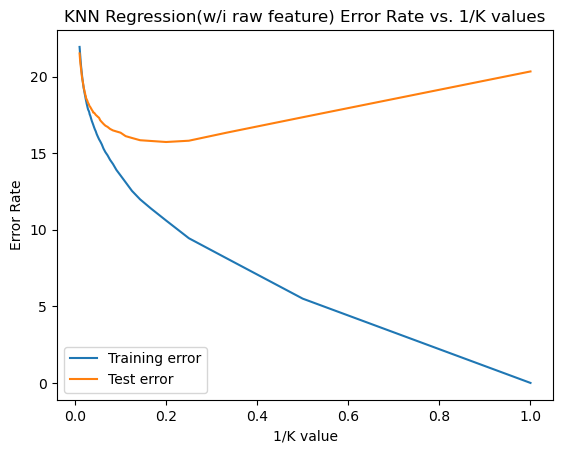

In [31]:
k_inv = []
k_best_raw_train = None
mse_best_raw_train = sys.maxsize
mse_best_raw_test = sys.maxsize
mse_raw_trainArr = []
mse_raw_testArr = []

for k in range(1,101):

    k_inv.append(1/k)

    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(train_x, train_y)

    y_pred_raw_train = knn_raw.predict(train_x)

    mse_raw_train = mean_squared_error(train_y, y_pred_raw_train)
    mse_raw_trainArr.append(mse_raw_train)

    if mse_raw_train < mse_best_raw_train:
        mse_best_raw_train = mse_raw_train
        k_best_raw_train = k

    y_pred_raw_test = knn_raw.predict(test_x)

    mse_raw_test = mean_squared_error(test_y, y_pred_raw_test)
    mse_raw_testArr.append(mse_raw_test)

    if mse_raw_test < mse_best_raw_test:
        mse_best_raw_test = mse_raw_test
        k_best_raw_test = k
    

print('The best training error: ', '%.3f' %mse_best_raw_train)
print('The k value for the best traing error: ', k_best_raw_train)
print('The best test error: ', '%.3f' %mse_best_raw_test)
print('The k value for the best test error: ', k_best_raw_test)


plt.plot(k_inv, mse_raw_trainArr, label='Training error')
plt.plot(k_inv, mse_raw_testArr, label='Test error')
plt.title('KNN Regression(w/i raw feature) Error Rate vs. 1/K values')
plt.xlabel('1/K value')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

The best training error:  0.000
The k value for the best traing error:  1
The best test error:  17.034
The k value for the best test error:  9


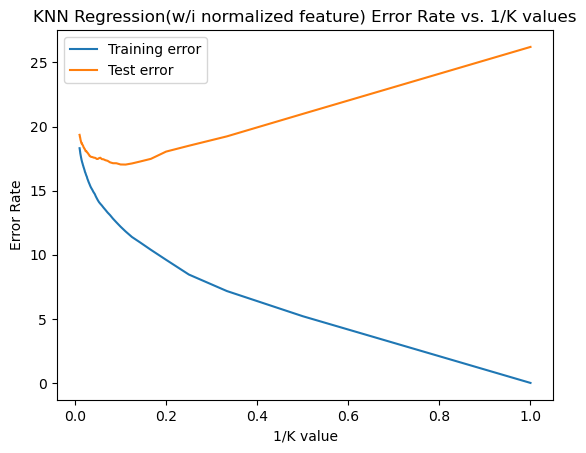

In [32]:
k_inv = []
k_best_nor_train = None
mse_best_nor_train = sys.maxsize
mse_best_nor_test = sys.maxsize
mse_nor_trainArr = []
mse_nor_testArr = []

scaler = MinMaxScaler()
train_x_nor = scaler.fit_transform(train_x)
test_x_nor = scaler.fit_transform(test_x)


for k in range(1,101):

    k_inv.append(1/k)

    knn_nor = KNeighborsRegressor(n_neighbors=k)
    knn_nor.fit(train_x_nor, train_y)

    y_pred_nor_train = knn_nor.predict(train_x_nor)

    mse_nor_train = mean_squared_error(train_y, y_pred_nor_train)
    mse_nor_trainArr.append(mse_nor_train)

    if mse_nor_train < mse_best_nor_train:
        mse_best_nor_train = mse_nor_train
        k_best_nor_train = k

    y_pred_nor_test = knn_nor.predict(test_x_nor)

    mse_nor_test = mean_squared_error(test_y, y_pred_nor_test)
    mse_nor_testArr.append(mse_nor_test)

    if mse_nor_test < mse_best_nor_test:
        mse_best_nor_test = mse_nor_test
        k_best_nor_test = k
    

print('The best training error: ', '%.3f' %mse_best_nor_train)
print('The k value for the best traing error: ', k_best_nor_train)
print('The best test error: ', '%.3f' %mse_best_nor_test)
print('The k value for the best test error: ', k_best_nor_test)


plt.plot(k_inv, mse_nor_trainArr, label='Training error')
plt.plot(k_inv, mse_nor_testArr, label='Test error')
plt.title('KNN Regression(w/i normalized feature) Error Rate vs. 1/K values')
plt.xlabel('1/K value')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

In [33]:
comparison_knn = [{'feature': 'raw', 'best training mse': mse_best_raw_train, 'best test mse': mse_best_raw_test},
              {'feature': 'normalized', 'best training mse': mse_best_nor_train, 'best test mse': mse_best_nor_test}]

comparison_knn = pd.DataFrame(comparison_knn)
comparison_knn.set_index('feature',inplace=True)
comparison_knn

,best training mse,best test mse
feature,,
raw,0.00,15.73
normalized,0.00,17.03


### (j ) Compare KNN and Linear  
- knn with raw feature yield the best test MSE.
- The bimodal distribution of PE implied there are possible nonlinear effect of or interaction between predictors. In this case, linear regression model including nonlinear and interactive predictors can remedy this issue. However, KNN, due to its nature of non-paremetric and making no assumption of underlying data distribution, outperform linear regression model in this case. Noticed that knn with normalized feature yield worse MSE implied that there exsit some features have more power of predicting the redults.

In [34]:
comparison_bw = [{'model': 'linear regreesion-base', 'best test mse': predict_test_base_mse},
                 {'model': 'linear regression-improved', 'best test mse': predict_test_imp_mse},
                 {'model': 'knn with raw feature', 'best test mse': mse_best_raw_test},
                 {'model': 'knn with normalized feature', 'best test mse': mse_best_nor_test}]
comparison_bw = pd.DataFrame(comparison_bw)
comparison_bw.set_index('model',inplace=True)
comparison_bw

,best test mse
model,
linear regreesion-base,21.24
linear regression-improved,18.66
knn with raw feature,15.73
knn with normalized feature,17.03


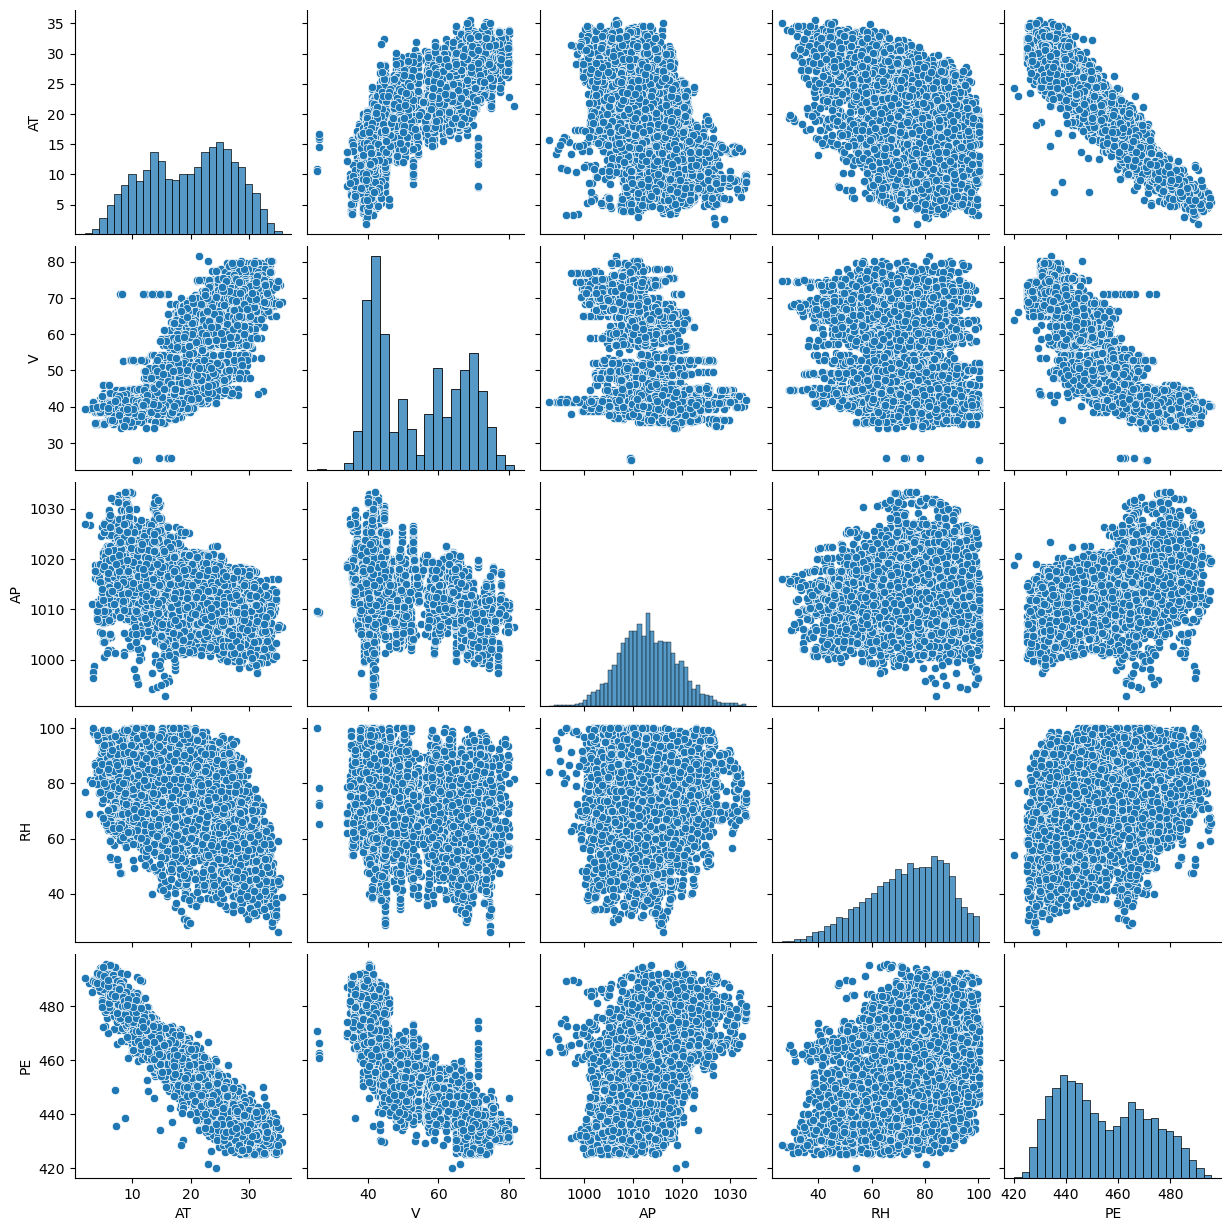

In [35]:
sns.pairplot(train)

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

- Answer: Flexible model would give better result.  
- Rationale: Because the number of predictors $\beta$ are not many, so it is expected we need some nonlinearities, flexible, to predict the result more precisely. However, it also introduce side effect, overfitting. But since the sample is extremely large, the overfitting can be mitigate.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

- Answer: Inflexible modle works better.
- Rationale: Since the sample is extremely small. If we use flexible model along with extremly large number of predictors, this model would be super overfitting. Hence, when it comes to predict new data, it loose it predicting power. When we have large number of predictors, it'd better to use inflexible(linear) model. Basically, it's the idea of neural networks.

### (c) The relationship between the predictors and response is highly non-linear.

- Answer: Flexbile model works better.
- Rationale: Since the relationship is non-linear, it's better for us to use flexible model. Knowing the relationship ahead of time is like to peek the answer before building a model. Since we already know the answer, we should adopt the model that fit the answer.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

- Answer: Inflexible models would work better.  
- Rationale: Flexible models would overfit the noise, it then becomes a super overfitting model only works on training set.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

We can think of these data points are distributed in a 3 dimensional space with coordinates: $X_1$, $X_2$, $X_3$. Given a test point X', we can calculate its Euclidean distance between each observation.
  
$$d(X,X') = \sqrt{(X_1-X_1')^2 + (X_2-X_2')^2 + (X_3-X_3')^2}$$

The result is as below:  </br>
 d(1,X') =  3  </br>
 d(2,X') =  2  </br>
 d(3,X') =      $\sqrt(10)$  
 d(4,X') =      $\sqrt(5)$  
 d(5,X') =      $\sqrt(2)$  
 d(6,X') =      $\sqrt(3)$  
  

### (b) What is our prediction with K = 1? Why?

- Answer: Green
- Rationale: k = 1, $y_{pred} = (Obs)_5$ , because it is closest to observation point 5.

### (c) What is our prediction with K = 3? Why?

- Answer: Red.  
- Rationale: k = 3, $y_{pred} = majority\_voting((Obs)_5, (Obs)_6, (Obs)_2) = majority\_voting(Green, Red, Red)$ = Red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

- Answer: small.  
- Rationale: Because we already know the boundary is 'highly non-linear', we expect our model to be more flexible. To make a flexible KNN, we need to use smaller K.